In [15]:
import numpy as np
import pandas as pd 

## Holt-Winters Exponential Smoothing
## It is a time series forecasting method that extends simple exponential smoothing to capture trends and seasonality. It consists of three components: level, trend, and seasonal smoothing. It’s commonly used for seasonal data to predict future values by adjusting for both trend and seasonal variations.

In [16]:
data = pd.read_csv("BrentOilPrices1.csv")
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8355,15-Apr-20,19.80
8356,16-Apr-20,18.69
8357,17-Apr-20,19.75
8358,20-Apr-20,17.36


# Data Preprocessing for Monthly Analysis

This code snippet outlines the steps to convert a dataset containing dates and corresponding values into a monthly aggregated format. The process involves several key steps, including date conversion, resampling, and formatting. Below is a breakdown of each step:

## Step 1: Convert 'Date' to Datetime and Set as Index

## Step 2: Resample to Monthly Frequency Using Mean

## Step 3: Format the Index to Show Only Month-Year

In [17]:

data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
data.set_index('Date', inplace=True)


monthly_data = data.resample('M').mean()


monthly_data.index = monthly_data.index.strftime('%b-%Y')

print(monthly_data)


              Price
Date               
May-1987  18.580000
Jun-1987  18.860476
Jul-1987  19.856522
Aug-1987  18.979524
Sep-1987  18.313182
...             ...
Dec-2019  67.310000
Jan-2020  63.824783
Feb-2020  55.702000
Mar-2020  32.470000
Apr-2020  19.702308

[396 rows x 1 columns]


C:\Users\SUKANNA DAS\AppData\Local\Temp\ipykernel_16480\2295496914.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


# Seasonal Decomposition of Time Series Data

This code snippet demonstrates how to perform seasonal decomposition on a time series dataset using both additive and multiplicative models. The results are visualized to show the trend, seasonal, and residual components for each model.






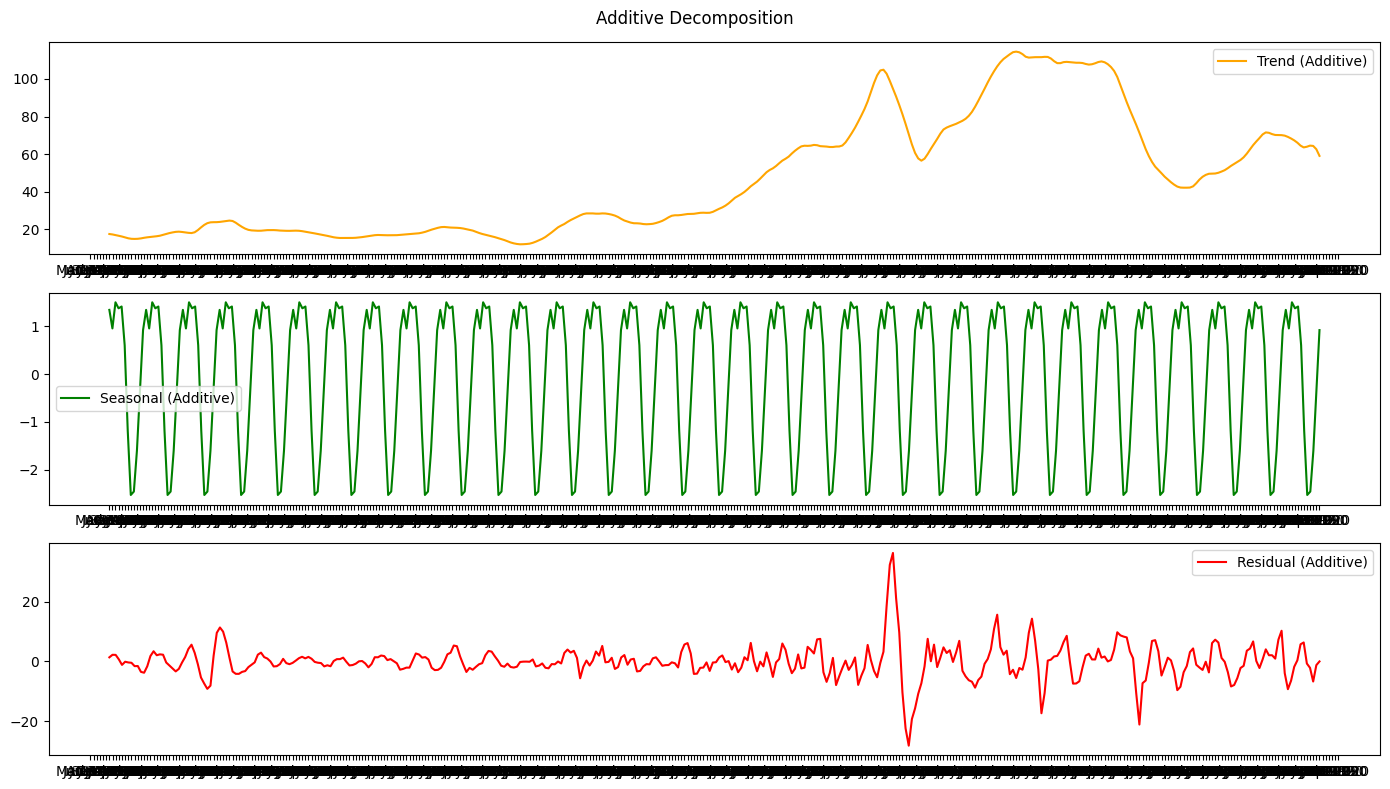

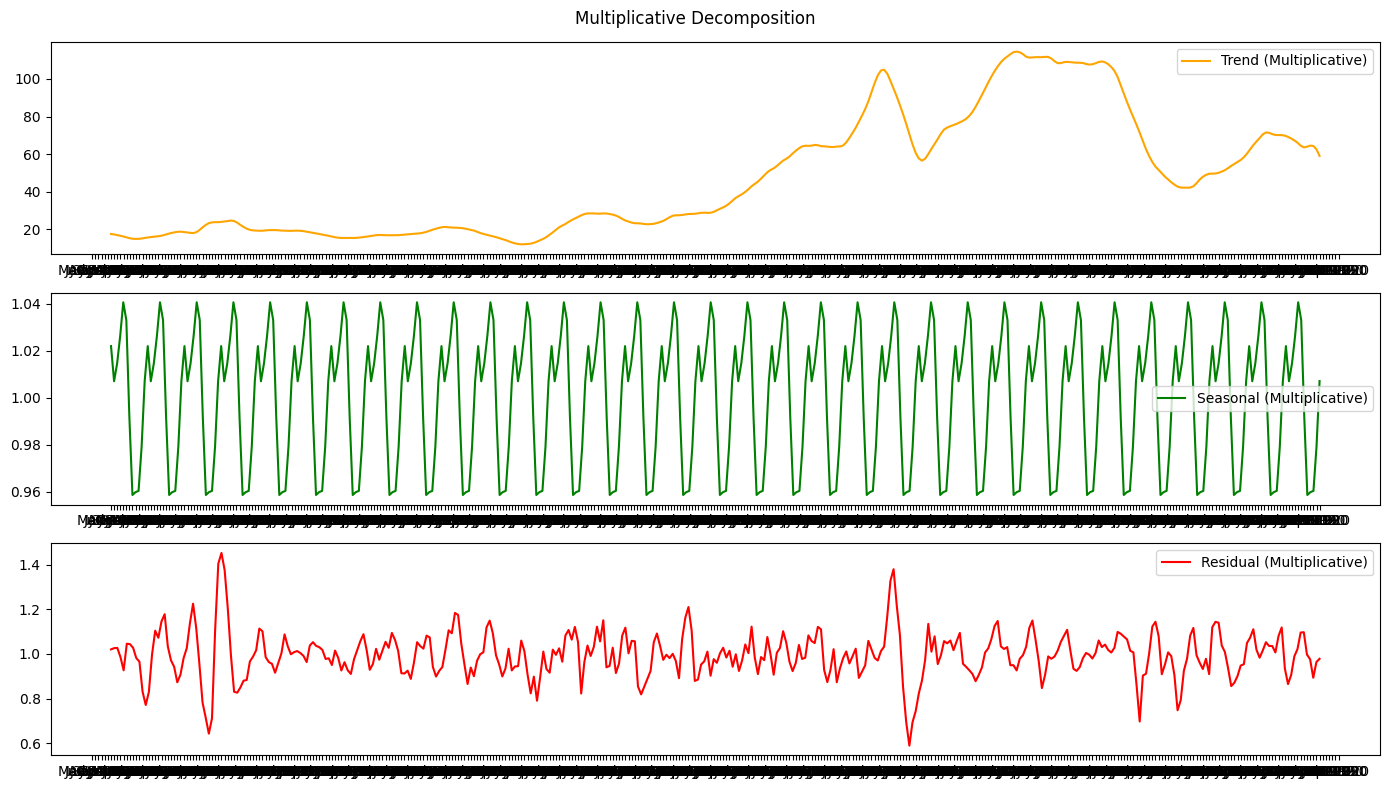

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose




# Additive decomposition
additive_decomposition = seasonal_decompose(monthly_data['Price'], model='additive', period=12)

# Multiplicative decomposition
multiplicative_decomposition = seasonal_decompose(monthly_data['Price'], model='multiplicative', period=12)

# Plot Additive Decomposition
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(monthly_data.index, additive_decomposition.trend, label='Trend (Additive)', color='orange')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(monthly_data.index, additive_decomposition.seasonal, label='Seasonal (Additive)', color='green')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, additive_decomposition.resid, label='Residual (Additive)', color='red')
plt.legend()

plt.suptitle('Additive Decomposition')
plt.tight_layout()
plt.show()

# Plot Multiplicative Decomposition
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(monthly_data.index, multiplicative_decomposition.trend, label='Trend (Multiplicative)', color='orange')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(monthly_data.index, multiplicative_decomposition.seasonal, label='Seasonal (Multiplicative)', color='green')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, multiplicative_decomposition.resid, label='Residual (Multiplicative)', color='red')
plt.legend()

plt.suptitle('Multiplicative Decomposition')
plt.tight_layout()
plt.show()



In [19]:
monthly_data.isnull().sum()

Price    0
dtype: int64

In [20]:
monthly_data

,Price
Date,
May-1987,18.580000
Jun-1987,18.860476
Jul-1987,19.856522
Aug-1987,18.979524
Sep-1987,18.313182
...,...
Dec-2019,67.310000
Jan-2020,63.824783
Feb-2020,55.702000


In [21]:
# Find rows with null values
rows_with_nulls = monthly_data[monthly_data.isnull().any(axis=1)]
print(rows_with_nulls)


Empty DataFrame
Columns: [Price]
Index: []


# Error Metrics Calculation for Seasonal Decomposition

This code snippet demonstrates how to compute the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for both additive and multiplicative seasonal decomposition models of a time series dataset. These metrics are essential for evaluating the accuracy of the models.

## Seeing the RMSE and MAE , we are selecting the model .

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Compute residual errors
additive_residuals = additive_decomposition.resid.dropna()
multiplicative_residuals = multiplicative_decomposition.resid.dropna()

# MAE
additive_mae = mean_absolute_error(monthly_data['Price'].loc[additive_residuals.index], additive_residuals)
multiplicative_mae = mean_absolute_error(monthly_data['Price'].loc[multiplicative_residuals.index], multiplicative_residuals)

print(f"Additive Model MAE: {additive_mae}")
print(f"Multiplicative Model MAE: {multiplicative_mae}")

# RMSE
additive_rmse = np.sqrt(mean_squared_error(monthly_data['Price'].loc[additive_residuals.index], additive_residuals))
multiplicative_rmse = np.sqrt(mean_squared_error(monthly_data['Price'].loc[multiplicative_residuals.index], multiplicative_residuals))

print(f"Additive Model RMSE: {additive_rmse}")
print(f"Multiplicative Model RMSE: {multiplicative_rmse}")

Additive Model MAE: 46.86126861840189
Multiplicative Model MAE: 45.86609026000232
Additive Model RMSE: 56.64802709624784
Multiplicative Model RMSE: 56.36590943980757


## here We choose  Multiplicative model because of it's low MAE and low RMSE

# Data Filtering: Removing Year 1987 from Monthly Data

This code snippet demonstrates how to filter a time series dataset by removing all data points corresponding to the year 1987. 


In [23]:

monthly_data.index = pd.to_datetime(monthly_data.index, format='%b-%Y')

# Remove all data points for the year 1987
monthly_data_filtered = monthly_data[monthly_data.index.year != 1987]

# Optionally, reset the index to the original format (Month-Year)
monthly_data_filtered.index = monthly_data_filtered.index.strftime('%b-%Y')

# Display the filtered data
print(monthly_data_filtered)


              Price
Date               
Jan-1988  16.749444
Feb-1988  15.729524
Mar-1988  14.731304
Apr-1988  16.595263
May-1988  16.314091
...             ...
Dec-2019  67.310000
Jan-2020  63.824783
Feb-2020  55.702000
Mar-2020  32.470000
Apr-2020  19.702308

[388 rows x 1 columns]


# Holt-Winters Exponential Smoothing Forecasting

This code snippet demonstrates how to use the Holt-Winters Exponential Smoothing method for forecasting future values based on a time series dataset. The process involves fitting the model, making predictions, and visualizing the results.



C:\Users\SUKANNA DAS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SUKANNA DAS\AppData\Local\Temp\ipykernel_16480\3572402039.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')


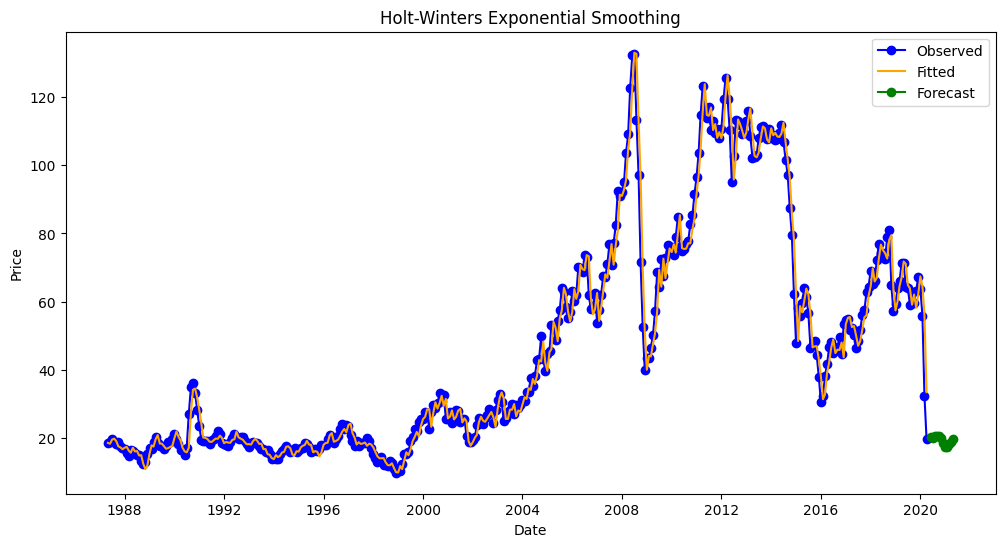

Forecasted Values:
            Forecasted Price
2020-05-31         20.233860
2020-06-30         19.982452
2020-07-31         20.661849
2020-08-31         20.619566
2020-09-30         20.703954
2020-10-31         19.954532
2020-11-30         18.441680
2020-12-31         17.379459
2021-01-31         17.452227
2021-02-28         18.137859
2021-03-31         18.741191
2021-04-30         19.702308


In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

model = sm.tsa.ExponentialSmoothing(monthly_data['Price'], seasonal='add', seasonal_periods=12)
holt_winters_fit = model.fit()

forecast = holt_winters_fit.forecast(steps=12)

forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
forecast_df = pd.DataFrame(data=forecast.values, index=forecast_index, columns=['Forecasted Price'])

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Price'], label='Observed', marker='o', color='blue')
plt.plot(holt_winters_fit.fittedvalues, label='Fitted', color='orange')
plt.plot(forecast_df['Forecasted Price'], label='Forecast', color='green', marker='o')
plt.title('Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("Forecasted Values:")
print(forecast_df)


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 4: Calculate MAE and RMSE for fitted values (train)
mae = mean_absolute_error(monthly_data['Price'], holt_winters_fit.fittedvalues)
rmse = np.sqrt(mean_squared_error(monthly_data['Price'], holt_winters_fit.fittedvalues))

# Print the MAE and RMSE
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.0161121799205595
Root Mean Squared Error (RMSE): 4.638151637499927


## The forecasted prices from May 2020 to April 2021 show fluctuations, peaking at approximately **20.66** in July and dropping to **17.38** by December. Despite a slight recovery to **18.74** in March 2021, the trend indicates market volatility, necessitating continuous monitoring of external factors influencing prices.